# Code for Section 2.4 Skewness, Kurtosis, and Other Interesting Insights

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import fortitudo.tech as ft
from scipy.stats import norm
import matplotlib.pyplot as plt

# Download and preprocess data

In [2]:
tickers = [
    'XLB', 'XLE', 'XLF', 'XLI', 'XLK',
    'XLP', 'XLU', 'XLV', 'XLY', '^GSPC',
    '^IRX', '^TNX', '^TYX', '^VIX']
data = yf.download(tickers, start='1998-12-22', end='2024-10-12')['Close']

names_dict = {
    'XLB': 'Materials', 'XLE': 'Energy', 'XLF': 'Financial', 'XLI': 'Industrial',
    'XLK': 'Technology', 'XLP': 'Consumer Staples', 'XLU': 'Utilities',
    'XLV': 'Health Care', 'XLY': 'Consumer Discretionary',
    '^GSPC': 'S&P 500', '^IRX': '13w yield', '^TNX': '2y yield',
    '^TYX': '30y yield', '^VIX': 'VIX'}
data = data.rename(columns=names_dict)

print(f'The number of daily observations is {len(data)}.')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  14 of 14 completed


The number of daily observations is 6493.


# Compute equity returns

In [3]:
H = 252
equity_returns = (data.values[H:, 0:10] - data.values[0:-H, 0:10]) / data.iloc[0:-H, 0:10]
equity_returns_df = pd.DataFrame(100 * equity_returns, columns=data.columns[0:10])
equity_stats = ft.simulation_moments(equity_returns_df)

display(equity_stats)

,Mean,Volatility,Skewness,Kurtosis
Ticker,,,,
Materials,9.480553,19.088620,0.009315,4.791483
Energy,11.040706,26.530663,0.200931,3.191927
Financial,7.888051,23.742689,0.039914,5.225006
Industrial,9.858542,19.232706,-0.129689,4.699945
Technology,11.543197,25.381599,-0.587754,3.260407
Consumer Staples,7.593449,11.224843,-0.694259,3.862388
Utilities,8.325712,15.527300,-0.795591,3.821509
Health Care,9.160104,12.982925,-0.074497,3.186592
Consumer Discretionary,10.797317,19.304731,-0.016470,4.199731


# Plot equity return distributions (Figure 2.4.1)

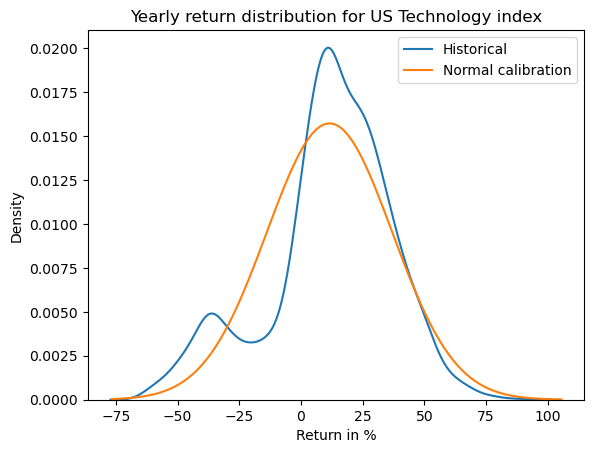

In [4]:
equity_index = 4  # Can be specified as desired
index_name = equity_returns_df.columns[equity_index]
x = np.linspace(
    1.2 * min(equity_returns_df[index_name]), 1.2 * max(equity_returns_df[index_name]), 100)
norm_calib = norm.pdf(x, loc=equity_stats['Mean'][index_name], scale=equity_stats['Volatility'][index_name])

sns.kdeplot(equity_returns_df[index_name])
plt.plot(x, norm_calib)
plt.title(f'Yearly return distribution for US {index_name} index')
plt.legend(['Historical', 'Normal calibration'])
plt.xlabel('Return in %')
plt.show()

# Equity correlation analysis (Table 2.4-2.5)

In [5]:
spx_tail_value = np.percentile(equity_returns_df['S&P 500'], 10)
tail_indices = equity_returns_df['S&P 500'].values <= spx_tail_value

In [6]:
np.round(100 * ft.correlation_matrix(equity_returns.iloc[tail_indices, :]), 1)

,0,1,2,3,4,5,6,7,8,9
"(0, Materials)",100.0,54.8,89.7,88.5,-42.7,54.4,56.0,62.5,85.6,83.2
"(1, Energy)",54.8,100.0,60.8,77.1,-10.9,52.3,65.0,52.4,23.2,63.1
"(2, Financial)",89.7,60.8,100.0,91.7,-40.4,45.8,53.7,72.5,80.1,85.9
"(3, Industrial)",88.5,77.1,91.7,100.0,-30.6,65.1,71.6,68.2,72.8,87.7
"(4, Technology)",-42.7,-10.9,-40.4,-30.6,100.0,-35.0,-35.0,4.7,-29.6,5.4
"(5, Consumer Staples)",54.4,52.3,45.8,65.1,-35.0,100.0,89.4,7.0,45.3,40.8
"(6, Utilities)",56.0,65.0,53.7,71.6,-35.0,89.4,100.0,12.7,40.2,44.6
"(7, Health Care)",62.5,52.4,72.5,68.2,4.7,7.0,12.7,100.0,58.4,81.7
"(8, Consumer Discretionary)",85.6,23.2,80.1,72.8,-29.6,45.3,40.2,58.4,100.0,76.7
"(9, S&P 500)",83.2,63.1,85.9,87.7,5.4,40.8,44.6,81.7,76.7,100.0


In [7]:
np.round(100 * ft.correlation_matrix(equity_returns.iloc[~tail_indices, :]), 1)

,0,1,2,3,4,5,6,7,8,9
"(0, Materials)",100.0,43.3,65.9,83.7,50.5,47.3,32.4,51.3,70.8,76.2
"(1, Energy)",43.3,100.0,34.5,44.0,3.3,16.4,34.9,9.1,5.0,29.1
"(2, Financial)",65.9,34.5,100.0,82.8,42.9,51.3,31.6,61.4,71.2,80.1
"(3, Industrial)",83.7,44.0,82.8,100.0,57.2,55.6,36.9,57.8,75.6,88.0
"(4, Technology)",50.5,3.3,42.9,57.2,100.0,14.6,4.4,51.1,60.7,82.3
"(5, Consumer Staples)",47.3,16.4,51.3,55.6,14.6,100.0,58.8,55.3,52.7,50.0
"(6, Utilities)",32.4,34.9,31.6,36.9,4.4,58.8,100.0,20.6,17.3,30.7
"(7, Health Care)",51.3,9.1,61.4,57.8,51.1,55.3,20.6,100.0,69.2,72.5
"(8, Consumer Discretionary)",70.8,5.0,71.2,75.6,60.7,52.7,17.3,69.2,100.0,83.0
"(9, S&P 500)",76.2,29.1,80.1,88.0,82.3,50.0,30.7,72.5,83.0,100.0


# Multi-asset analysis (Table 2.6-2.7)

In [8]:
multi_asset = data.iloc[:, -5:]
multi_asset = multi_asset.bfill()

# Compute constant maturity discount factors
multi_asset['13w yield'] = 1 / (1 + multi_asset['13w yield'].values / 100) ** (13/52)
multi_asset['2y yield'] = 1 / (1 + multi_asset['2y yield'].values / 100) ** 2
multi_asset['30y yield'] = 1 / (1 + multi_asset['30y yield'].values / 100) ** 30

# Compute log returns / changes
log_diffs = np.diff(np.log(multi_asset), n=1, axis=0)
log_diffs = pd.DataFrame(100 * log_diffs, columns=data.columns[-5:])

In [9]:
vix_spikes = np.percentile(log_diffs['VIX'], 90)
vix_spikes_indices = log_diffs['VIX'].values > vix_spikes

In [10]:
np.round(100 * ft.correlation_matrix(log_diffs.iloc[vix_spikes_indices, :]), 1)

,0,1,2,3,4
"(0, S&P 500)",100.0,-25.3,-32.9,-32.6,-46.1
"(1, 13w yield)",-25.3,100.0,29.8,17.9,8.4
"(2, 2y yield)",-32.9,29.8,100.0,93.5,19.4
"(3, 30y yield)",-32.6,17.9,93.5,100.0,18.2
"(4, VIX)",-46.1,8.4,19.4,18.2,100.0


In [11]:
np.round(100 * ft.correlation_matrix(log_diffs.iloc[~vix_spikes_indices, :]), 1)

,0,1,2,3,4
"(0, S&P 500)",100.0,-5.4,-19.7,-19.6,-65.8
"(1, 13w yield)",-5.4,100.0,18.2,13.7,1.6
"(2, 2y yield)",-19.7,18.2,100.0,92.9,13.6
"(3, 30y yield)",-19.6,13.7,92.9,100.0,13.4
"(4, VIX)",-65.8,1.6,13.6,13.4,100.0


# Multi-asset plot

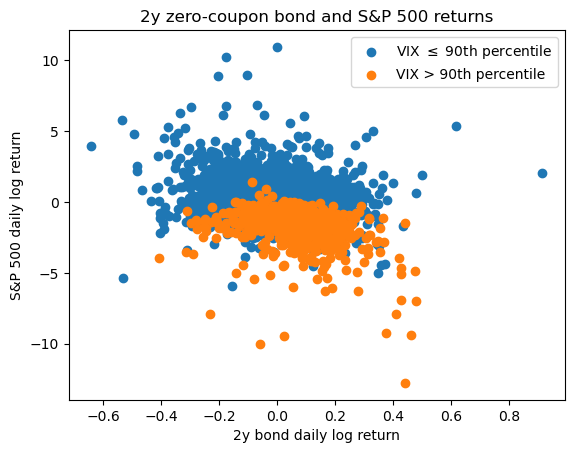

In [12]:
plt.scatter(log_diffs.iloc[~vix_spikes_indices, 2], log_diffs.iloc[~vix_spikes_indices, 0])
plt.scatter(log_diffs.iloc[vix_spikes_indices, 2], log_diffs.iloc[vix_spikes_indices, 0])
plt.ylabel('S&P 500 daily log return')
plt.xlabel('2y bond daily log return')
plt.title('2y zero-coupon bond and S&P 500 returns')
plt.legend([r'VIX $\leq$ 90th percentile', 'VIX > 90th percentile'])
plt.show()

In [13]:
# pcrm-book - Next generation investment analysis.
# Copyright (C) 2025 Anton Vorobets.

# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
# GNU General Public License for more details.

# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <https://www.gnu.org/licenses/>.